In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import csv

## Loading Dataset 

In [6]:
dataset_beijing  = pd.read_csv('ML\Crux Inductions\FiveCitiePMData\BeijingPM20100101_20151231.csv')

In [7]:
dataset_beijing.head()

No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  1019.0 -11.0   NW   6.71   
3              NaN         NaN -21.0  55.0  1019.0 -14.0   NW   9.84   
4              NaN         NaN -20.0  51.0  1018.0 -12.0   NW  12.97   

   precipitation  Iprec  
0            0.0    0.0  
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    0.0

## Data Cleaning 

In [8]:
dataset_beijing.drop(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan'],
                    axis=1,
                    inplace=True)

Note for parameter:

axis : {0 or ‘index’, 1 or ‘columns’}, default 0
Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

inplace : bool, default False
If True, do operation inplace and return None.

In [9]:
dataset_beijing.dropna(axis=0, how='any', inplace=True)

Note for parameter:

how : {‘any’, ‘all’}, default ‘any’
Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.

‘any’ : If any NA values are present, drop that row or column.
‘all’ : If all values are NA, drop that row or column.

In [10]:
g = []

In [11]:
for i in range(49579):
    g.append(dataset_beijing.index.values[i])

In [12]:
labelEncoder = LabelEncoder()
dataset_beijing['cbwd'] = labelEncoder.fit_transform(dataset_beijing['cbwd'])

LabelEncoder:
Encode labels with value between 0 and n_classes-1.

Label Encoder vs. One Hot Encoder in Machine Learning:
https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

## Labels for pollution

In [13]:
dataset_beijing["Result"] = 0

In [14]:
dataset_beijing.head()

No  year  month  day  hour  season  PM_US Post  DEWP  HUMI    PRES  TEMP  \
23  24  2010      1    1    23       4       129.0 -17.0  41.0  1020.0  -5.0   
24  25  2010      1    2     0       4       148.0 -16.0  38.0  1020.0  -4.0   
25  26  2010      1    2     1       4       159.0 -15.0  42.0  1020.0  -4.0   
26  27  2010      1    2     2       4       181.0 -11.0  63.5  1021.0  -5.0   
27  28  2010      1    2     3       4       138.0  -7.0  85.0  1022.0  -5.0   

    cbwd   Iws  precipitation  Iprec  Result  
23     3  0.89            0.0    0.0       0  
24     2  1.79            0.0    0.0       0  
25     2  2.68            0.0    0.0       0  
26     2  3.57            0.0    0.0       0  
27     2  5.36            0.0    0.0       0

In [15]:
for i in range(49579):
    if dataset_beijing["PM_US Post"][g[i]] > 75:
        dataset_beijing["Result"][g[i]] = 1        

C:\Users\Rakesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [242]:
dataset_beijing2 = dataset_beijing

In [ ]:
dataset_beijing2.to_excel('bejing_pollutionlabels.xlsx')

In [8]:
dataset_beijing2 = pd.read_excel('bejing_pollutionlabels.xlsx')

## Scaling and Splitting Data

In [18]:
y = dataset_beijing['Result']
X = dataset_beijing.drop('Result', axis=1)

In [19]:
standardScaler=StandardScaler()
X_scaled=standardScaler.fit_transform(X)

Note:

Q)
  Why do data scientists use Sklearn’s StandardScaler and what does it do?

A)  
 It turns out that standardizing your data is much more than having the number of row items in your CSV equal the number of labels (headers) the CSV has. Standardization is a bit more than that, and as the documentation states, “it is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data…”.

This means that before you start training or predicting on your dataset, you first need to eliminate the “oddballs”. You need to remove values that aren’t centered around 0, because they might throw off the learning your algorithm is doing.

https://medium.com/@oprearocks/why-do-data-scientists-use-sklearns-standardscaler-and-what-does-it-do-9d93e248eb4

In [20]:
print("X_scaled.shape:",X_scaled.shape)
print("y.shape:",y.shape)

X_scaled.shape: (49579, 15)
y.shape: (49579,)


In [31]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.10, random_state = 0)

In [32]:
print("X_train.shape:",X_train.shape)
print("y_train.shape:",y_train.shape)
print("X_test.shape:",X_test.shape)
print("y_test.shape",y_test.shape)

X_train.shape: (44621, 15)
y_train.shape: (44621,)
X_test.shape: (4958, 15)
y_test.shape (4958,)


## Training 

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(verbose=10, max_iter=100)

In [ ]:
model.fit(X_train, y_train)

In [30]:
model.score(X_test, y_test)

0.9986284792254941

## Autoregression

### Preparing dataset for Autoregression

In [90]:
dataset_beijing_ar  = pd.read_csv('ML\Crux Inductions\FiveCitiePMData\BeijingPM20100101_20151231.csv')

In [91]:
dataset_beijing_ar['period'] = dataset_beijing_ar['hour'].astype(str) + ' ' + dataset_beijing_ar['day'].astype(str) + ' ' + dataset_beijing_ar['month'].astype(str)  + ' ' + dataset_beijing_ar['year'].astype(str)

In [92]:
dataset_beijing_ar.head()

No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  1019.0 -11.0   NW   6.71   
3              NaN         NaN -21.0  55.0  1019.0 -14.0   NW   9.84   
4              NaN         NaN -20.0  51.0  1018.0 -12.0   NW  12.97   

   precipitation  Iprec      period  
0            0.0    0.0  0 1 1 2010  
1            0.0    0.0  1 1 1 2010  
2            0.0    0.0  2 1 1 2010  
3            0.0    0.0  3 1 1 2010  
4            0.0    0.0  4 1 1 2010

In [93]:
dataset_beijing_ar2 = dataset_beijing_ar.drop(['No','year', 'month', 'day', 
                                                'hour', 'season', 'DEWP', 'HUMI',
                                                'PRES', 'cbwd', 'Iws', 'precipitation', 'Iprec','PM_Dongsi',
                                               'PM_Dongsihuan', 'PM_Nongzhanguan',
                                                'TEMP'], axis=1)

In [94]:
dataset_beijing_ar2["PM_US Post"], dataset_beijing_ar2["period"]=dataset_beijing_ar2["period"],dataset_beijing_ar2["PM_US Post"]


In [95]:
col_list = list(dataset_beijing_ar2)
col_list[0], col_list[1]=col_list[1],col_list[0]
dataset_beijing_ar2.columns = col_list

In [96]:
dataset_beijing_ar2.head()

period  PM_US Post
0  0 1 1 2010         NaN
1  1 1 1 2010         NaN
2  2 1 1 2010         NaN
3  3 1 1 2010         NaN
4  4 1 1 2010         NaN

In [97]:
from datetime import datetime

for i in range(49579):
    date_string = dataset_beijing_ar2['period'][i]
    dataset_beijing_ar2['period'][i] = datetime.strptime(date_string, '%H %d %m %Y')

C:\Users\Rakesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [191]:
dataset_beijing_ar3 = dataset_beijing_ar2

In [192]:
dataset_beijing_ar3.set_index(dataset_beijing_ar3['period'], inplace=True)

In [193]:
dataset_beijing_ar4 = dataset_beijing_ar3.drop(['period'], axis=1)

In [194]:
dataset_beijing_ar5 = dataset_beijing_ar4.dropna(axis=0)

In [202]:
dataset_beijing_ar5.head()

PM_US Post
period                         
2010-01-01 23:00:00       129.0
2010-01-02 00:00:00       148.0
2010-01-02 01:00:00       159.0
2010-01-02 02:00:00       181.0
2010-01-02 03:00:00       138.0

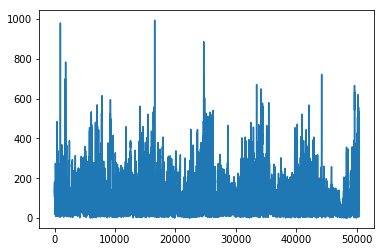

In [203]:
y = [i for i in range(50387)]

plt.plot(y, dataset_beijing_ar5['PM_US Post'])

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [205]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([4, 4, 32, 32]) # left, bottom, width, height (range 0 to 1)


plt.plot(y, dataset_beijing_ar5['PM_US Post']) # 'r' is the color red
plt.xlabel('Period')
plt.ylabel('PM_US Post')
#plt.title('String Title Here')
plt.show()

Above graph has no significant trend

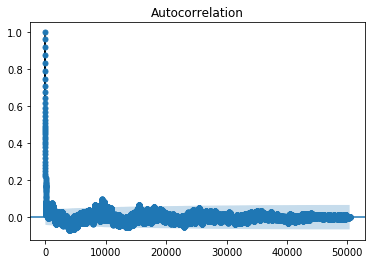

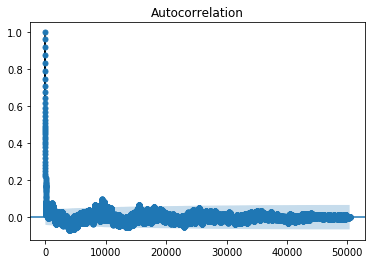

In [206]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataset_beijing_ar5['PM_US Post'])

Autocorrelation graph suggests Stationary series

In [207]:
len(dataset_beijing_ar5)

50387

In [208]:
X = dataset_beijing_ar5['PM_US Post']

In [209]:
y = X.values

In [217]:
train , test = y[:35000], y[35000:]

## Model

In [234]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [235]:
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [236]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))


predicted=51.388512, expected=54.000000
predicted=56.069194, expected=55.000000
predicted=56.436660, expected=67.000000
predicted=69.986012, expected=71.000000
predicted=71.731112, expected=76.000000
predicted=77.132640, expected=72.000000
predicted=71.817092, expected=75.000000
predicted=76.474915, expected=93.000000
predicted=96.381479, expected=89.000000
predicted=87.207205, expected=98.000000
predicted=100.078028, expected=97.000000
predicted=96.036561, expected=109.000000
predicted=110.665930, expected=89.000000
predicted=84.054520, expected=66.000000
predicted=63.423882, expected=72.000000
predicted=74.596126, expected=37.000000
predicted=31.392269, expected=21.000000
predicted=21.758958, expected=17.000000
predicted=20.315959, expected=17.000000
predicted=20.066745, expected=11.000000
predicted=13.858007, expected=16.000000
predicted=21.710130, expected=11.000000
predicted=14.696169, expected=17.000000
predicted=22.664479, expected=31.000000
predicted=37.581167, expected=61.0000

predicted=64.033262, expected=51.000000
predicted=53.684296, expected=47.000000
predicted=48.627365, expected=41.000000
predicted=41.160876, expected=42.000000
predicted=46.274729, expected=49.000000
predicted=52.223944, expected=58.000000
predicted=60.989479, expected=63.000000
predicted=65.045745, expected=67.000000
predicted=68.829585, expected=72.000000
predicted=73.136094, expected=105.000000
predicted=111.771701, expected=86.000000
predicted=80.070684, expected=81.000000
predicted=81.291863, expected=92.000000
predicted=94.472208, expected=93.000000
predicted=93.179064, expected=105.000000
predicted=107.616779, expected=94.000000
predicted=92.413868, expected=91.000000
predicted=90.528383, expected=83.000000
predicted=82.483236, expected=96.000000
predicted=98.429660, expected=113.000000
predicted=115.279136, expected=121.000000
predicted=119.279410, expected=136.000000
predicted=137.449265, expected=132.000000
predicted=127.376090, expected=133.000000
predicted=132.149926, expec

predicted=18.372369, expected=22.000000
predicted=25.680739, expected=31.000000
predicted=35.086053, expected=49.000000
predicted=53.693856, expected=52.000000
predicted=52.735568, expected=59.000000
predicted=61.773773, expected=67.000000
predicted=69.683204, expected=62.000000
predicted=61.364863, expected=58.000000
predicted=59.592046, expected=50.000000
predicted=50.790217, expected=71.000000
predicted=76.931411, expected=76.000000
predicted=76.820044, expected=82.000000
predicted=83.144675, expected=83.000000
predicted=83.813351, expected=99.000000
predicted=102.695190, expected=78.000000
predicted=72.094811, expected=80.000000
predicted=81.485221, expected=77.000000
predicted=76.178871, expected=79.000000
predicted=79.566992, expected=79.000000
predicted=78.686269, expected=59.000000
predicted=56.950357, expected=75.000000
predicted=80.055323, expected=94.000000
predicted=97.829978, expected=88.000000
predicted=86.602045, expected=88.000000
predicted=89.522101, expected=85.000000

predicted=18.481746, expected=17.000000
predicted=20.678054, expected=14.000000
predicted=17.258888, expected=11.000000
predicted=14.004792, expected=9.000000
predicted=12.482987, expected=6.000000
predicted=9.518450, expected=6.000000
predicted=9.913311, expected=13.000000
predicted=16.814369, expected=10.000000
predicted=12.302691, expected=16.000000
predicted=20.580809, expected=16.000000
predicted=18.309392, expected=14.000000
predicted=16.368303, expected=18.000000
predicted=21.389742, expected=19.000000
predicted=21.559696, expected=15.000000
predicted=17.648826, expected=12.000000
predicted=14.720576, expected=18.000000
predicted=22.992567, expected=17.000000
predicted=19.710084, expected=16.000000
predicted=19.678257, expected=16.000000
predicted=19.653203, expected=11.000000
predicted=13.398870, expected=15.000000
predicted=18.757829, expected=8.000000
predicted=10.353692, expected=12.000000
predicted=16.192745, expected=19.000000
predicted=23.114074, expected=21.000000
predic

predicted=39.982122, expected=50.000000
predicted=53.034696, expected=59.000000
predicted=61.865679, expected=49.000000
predicted=51.170719, expected=30.000000
predicted=29.702807, expected=28.000000
predicted=34.706393, expected=27.000000
predicted=30.792441, expected=21.000000
predicted=22.579285, expected=21.000000
predicted=25.355698, expected=25.000000
predicted=30.200348, expected=34.000000
predicted=38.382483, expected=37.000000
predicted=42.204224, expected=39.000000
predicted=43.243727, expected=36.000000
predicted=39.836822, expected=19.000000
predicted=18.224199, expected=23.000000
predicted=27.991084, expected=24.000000
predicted=25.331421, expected=25.000000
predicted=27.326482, expected=12.000000
predicted=12.621189, expected=9.000000
predicted=12.098126, expected=8.000000
predicted=9.891276, expected=10.000000
predicted=11.646108, expected=6.000000
predicted=7.224567, expected=11.000000
predicted=14.413586, expected=10.000000
predicted=12.377723, expected=9.000000
predic

predicted=25.949846, expected=20.000000
predicted=20.294292, expected=11.000000
predicted=12.769514, expected=28.000000
predicted=33.316059, expected=39.000000
predicted=42.253372, expected=38.000000
predicted=39.449807, expected=14.000000
predicted=12.859520, expected=11.000000
predicted=15.270711, expected=18.000000
predicted=22.104384, expected=8.000000
predicted=8.695013, expected=10.000000
predicted=14.116382, expected=10.000000
predicted=13.812214, expected=11.000000
predicted=14.475478, expected=23.000000
predicted=28.796197, expected=34.000000
predicted=38.554212, expected=40.000000
predicted=43.486665, expected=43.000000
predicted=45.636242, expected=48.000000
predicted=51.404810, expected=57.000000
predicted=59.912786, expected=61.000000
predicted=62.751628, expected=60.000000
predicted=61.307868, expected=68.000000
predicted=70.701178, expected=76.000000
predicted=77.832507, expected=72.000000
predicted=71.515078, expected=80.000000
predicted=81.837259, expected=80.000000
pr

predicted=16.018058, expected=12.000000
predicted=16.982305, expected=14.000000
predicted=20.414450, expected=14.000000
predicted=21.173882, expected=10.000000
predicted=15.330152, expected=8.000000
predicted=14.692929, expected=9.000000
predicted=16.232094, expected=9.000000
predicted=15.958841, expected=8.000000
predicted=9.831125, expected=17.000000
predicted=22.425460, expected=30.000000
predicted=32.860333, expected=43.000000
predicted=46.897218, expected=57.000000
predicted=54.911386, expected=65.000000
predicted=66.661308, expected=80.000000
predicted=83.410778, expected=88.000000
predicted=85.893977, expected=96.000000
predicted=96.316966, expected=121.000000
predicted=124.421377, expected=152.000000
predicted=153.992961, expected=172.000000
predicted=171.067280, expected=128.000000
predicted=116.340975, expected=77.000000
predicted=69.576004, expected=65.000000
predicted=64.877375, expected=79.000000
predicted=80.280020, expected=93.000000
predicted=92.944646, expected=104.000

predicted=288.383220, expected=286.000000
predicted=277.514097, expected=276.000000
predicted=265.854560, expected=220.000000
predicted=204.555164, expected=289.000000
predicted=299.303896, expected=308.000000
predicted=303.760367, expected=293.000000
predicted=284.628890, expected=297.000000
predicted=297.488441, expected=307.000000
predicted=306.809673, expected=262.000000
predicted=248.649980, expected=197.000000
predicted=186.680876, expected=177.000000
predicted=176.311248, expected=168.000000
predicted=164.011559, expected=169.000000
predicted=167.287095, expected=172.000000
predicted=170.878303, expected=195.000000
predicted=195.948762, expected=214.000000
predicted=212.458159, expected=240.000000
predicted=239.038568, expected=252.000000
predicted=246.633983, expected=256.000000
predicted=250.376522, expected=241.000000
predicted=231.341590, expected=250.000000
predicted=246.428019, expected=249.000000
predicted=241.063269, expected=246.000000
predicted=238.200865, expected=204

predicted=42.898621, expected=46.000000
predicted=49.673908, expected=37.000000
predicted=37.891605, expected=42.000000
predicted=46.441525, expected=47.000000
predicted=49.672969, expected=49.000000
predicted=51.202746, expected=51.000000
predicted=52.984320, expected=58.000000
predicted=61.317234, expected=55.000000
predicted=54.998652, expected=54.000000
predicted=54.704280, expected=48.000000
predicted=47.670093, expected=42.000000
predicted=42.470612, expected=29.000000
predicted=27.232330, expected=31.000000
predicted=34.607471, expected=35.000000
predicted=37.226526, expected=36.000000
predicted=37.682165, expected=39.000000
predicted=42.413717, expected=34.000000
predicted=36.163814, expected=17.000000
predicted=17.270916, expected=17.000000
predicted=21.410103, expected=18.000000
predicted=21.187156, expected=12.000000
predicted=14.631729, expected=12.000000
predicted=16.299302, expected=11.000000
predicted=15.272305, expected=15.000000
predicted=19.614971, expected=20.000000


predicted=13.531279, expected=10.000000
predicted=12.885697, expected=9.000000
predicted=12.061525, expected=10.000000
predicted=14.514431, expected=11.000000
predicted=15.034926, expected=15.000000
predicted=20.083575, expected=14.000000
predicted=18.885796, expected=8.000000
predicted=11.712773, expected=13.000000
predicted=19.288083, expected=14.000000
predicted=19.150760, expected=11.000000
predicted=15.107775, expected=21.000000
predicted=27.541498, expected=18.000000
predicted=21.684321, expected=19.000000
predicted=25.008615, expected=22.000000
predicted=27.164219, expected=32.000000
predicted=36.651243, expected=28.000000
predicted=28.711750, expected=44.000000
predicted=48.824642, expected=30.000000
predicted=28.873112, expected=26.000000
predicted=26.673005, expected=11.000000
predicted=9.157274, expected=16.000000
predicted=19.125814, expected=17.000000
predicted=17.089050, expected=16.000000
predicted=18.512420, expected=59.000000
predicted=68.432735, expected=34.000000
pre

predicted=30.706019, expected=30.000000
predicted=33.221908, expected=23.000000
predicted=24.800248, expected=15.000000
predicted=17.343066, expected=21.000000
predicted=25.988037, expected=15.000000
predicted=16.418624, expected=19.000000
predicted=23.285371, expected=20.000000
predicted=22.693773, expected=30.000000
predicted=34.157729, expected=28.000000
predicted=30.013812, expected=32.000000
predicted=35.473457, expected=31.000000
predicted=33.147933, expected=28.000000
predicted=29.764554, expected=31.000000
predicted=34.102452, expected=29.000000
predicted=31.001174, expected=15.000000
predicted=15.237262, expected=17.000000
predicted=21.589059, expected=22.000000
predicted=25.857246, expected=27.000000
predicted=30.589733, expected=31.000000
predicted=34.613663, expected=30.000000
predicted=32.928334, expected=35.000000
predicted=38.367224, expected=36.000000
predicted=38.275752, expected=59.000000
predicted=65.105853, expected=58.000000
predicted=58.485850, expected=64.000000


predicted=18.416360, expected=16.000000
predicted=19.513769, expected=20.000000
predicted=23.016549, expected=19.000000
predicted=21.399435, expected=23.000000
predicted=26.945073, expected=62.000000
predicted=70.617184, expected=69.000000
predicted=68.808663, expected=80.000000
predicted=82.776503, expected=106.000000
predicted=110.279472, expected=113.000000
predicted=111.386666, expected=125.000000
predicted=125.384086, expected=119.000000
predicted=116.156844, expected=111.000000
predicted=108.091664, expected=96.000000
predicted=92.456161, expected=96.000000
predicted=95.288693, expected=71.000000
predicted=65.590146, expected=80.000000
predicted=82.613752, expected=94.000000
predicted=96.146632, expected=101.000000
predicted=100.779854, expected=119.000000
predicted=121.032267, expected=120.000000
predicted=119.743577, expected=105.000000
predicted=102.177877, expected=96.000000
predicted=95.329413, expected=91.000000
predicted=90.566114, expected=91.000000
predicted=91.742408, e

predicted=159.313478, expected=168.000000
predicted=166.439450, expected=151.000000
predicted=144.068605, expected=151.000000
predicted=148.791922, expected=163.000000
predicted=161.283088, expected=157.000000
predicted=151.159312, expected=161.000000
predicted=158.583739, expected=152.000000
predicted=146.470983, expected=143.000000
predicted=138.081084, expected=152.000000
predicted=150.333820, expected=154.000000
predicted=150.429937, expected=105.000000
predicted=92.653251, expected=91.000000
predicted=90.510268, expected=87.000000
predicted=87.045931, expected=91.000000
predicted=91.472053, expected=99.000000
predicted=102.056883, expected=107.000000
predicted=110.454520, expected=120.000000
predicted=124.409685, expected=131.000000
predicted=134.615422, expected=151.000000
predicted=155.390890, expected=153.000000
predicted=151.763144, expected=175.000000
predicted=179.339860, expected=201.000000
predicted=201.587171, expected=206.000000
predicted=201.604940, expected=201.000000


predicted=52.696167, expected=73.000000
predicted=79.469937, expected=80.000000
predicted=81.536396, expected=91.000000
predicted=93.390844, expected=88.000000
predicted=87.174989, expected=90.000000
predicted=91.854358, expected=74.000000
predicted=70.700358, expected=63.000000
predicted=63.097691, expected=60.000000
predicted=61.292566, expected=59.000000
predicted=59.990653, expected=50.000000
predicted=49.720967, expected=45.000000
predicted=47.060395, expected=32.000000
predicted=31.935700, expected=36.000000
predicted=40.412535, expected=45.000000
predicted=48.532193, expected=49.000000
predicted=51.926183, expected=61.000000
predicted=65.161551, expected=71.000000
predicted=73.936720, expected=87.000000
predicted=90.507550, expected=100.000000
predicted=102.350654, expected=99.000000
predicted=97.638484, expected=91.000000
predicted=90.708785, expected=89.000000
predicted=89.258561, expected=105.000000
predicted=108.159218, expected=95.000000
predicted=91.499891, expected=111.00

In [237]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 422.949


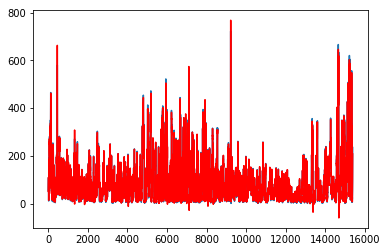

In [239]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

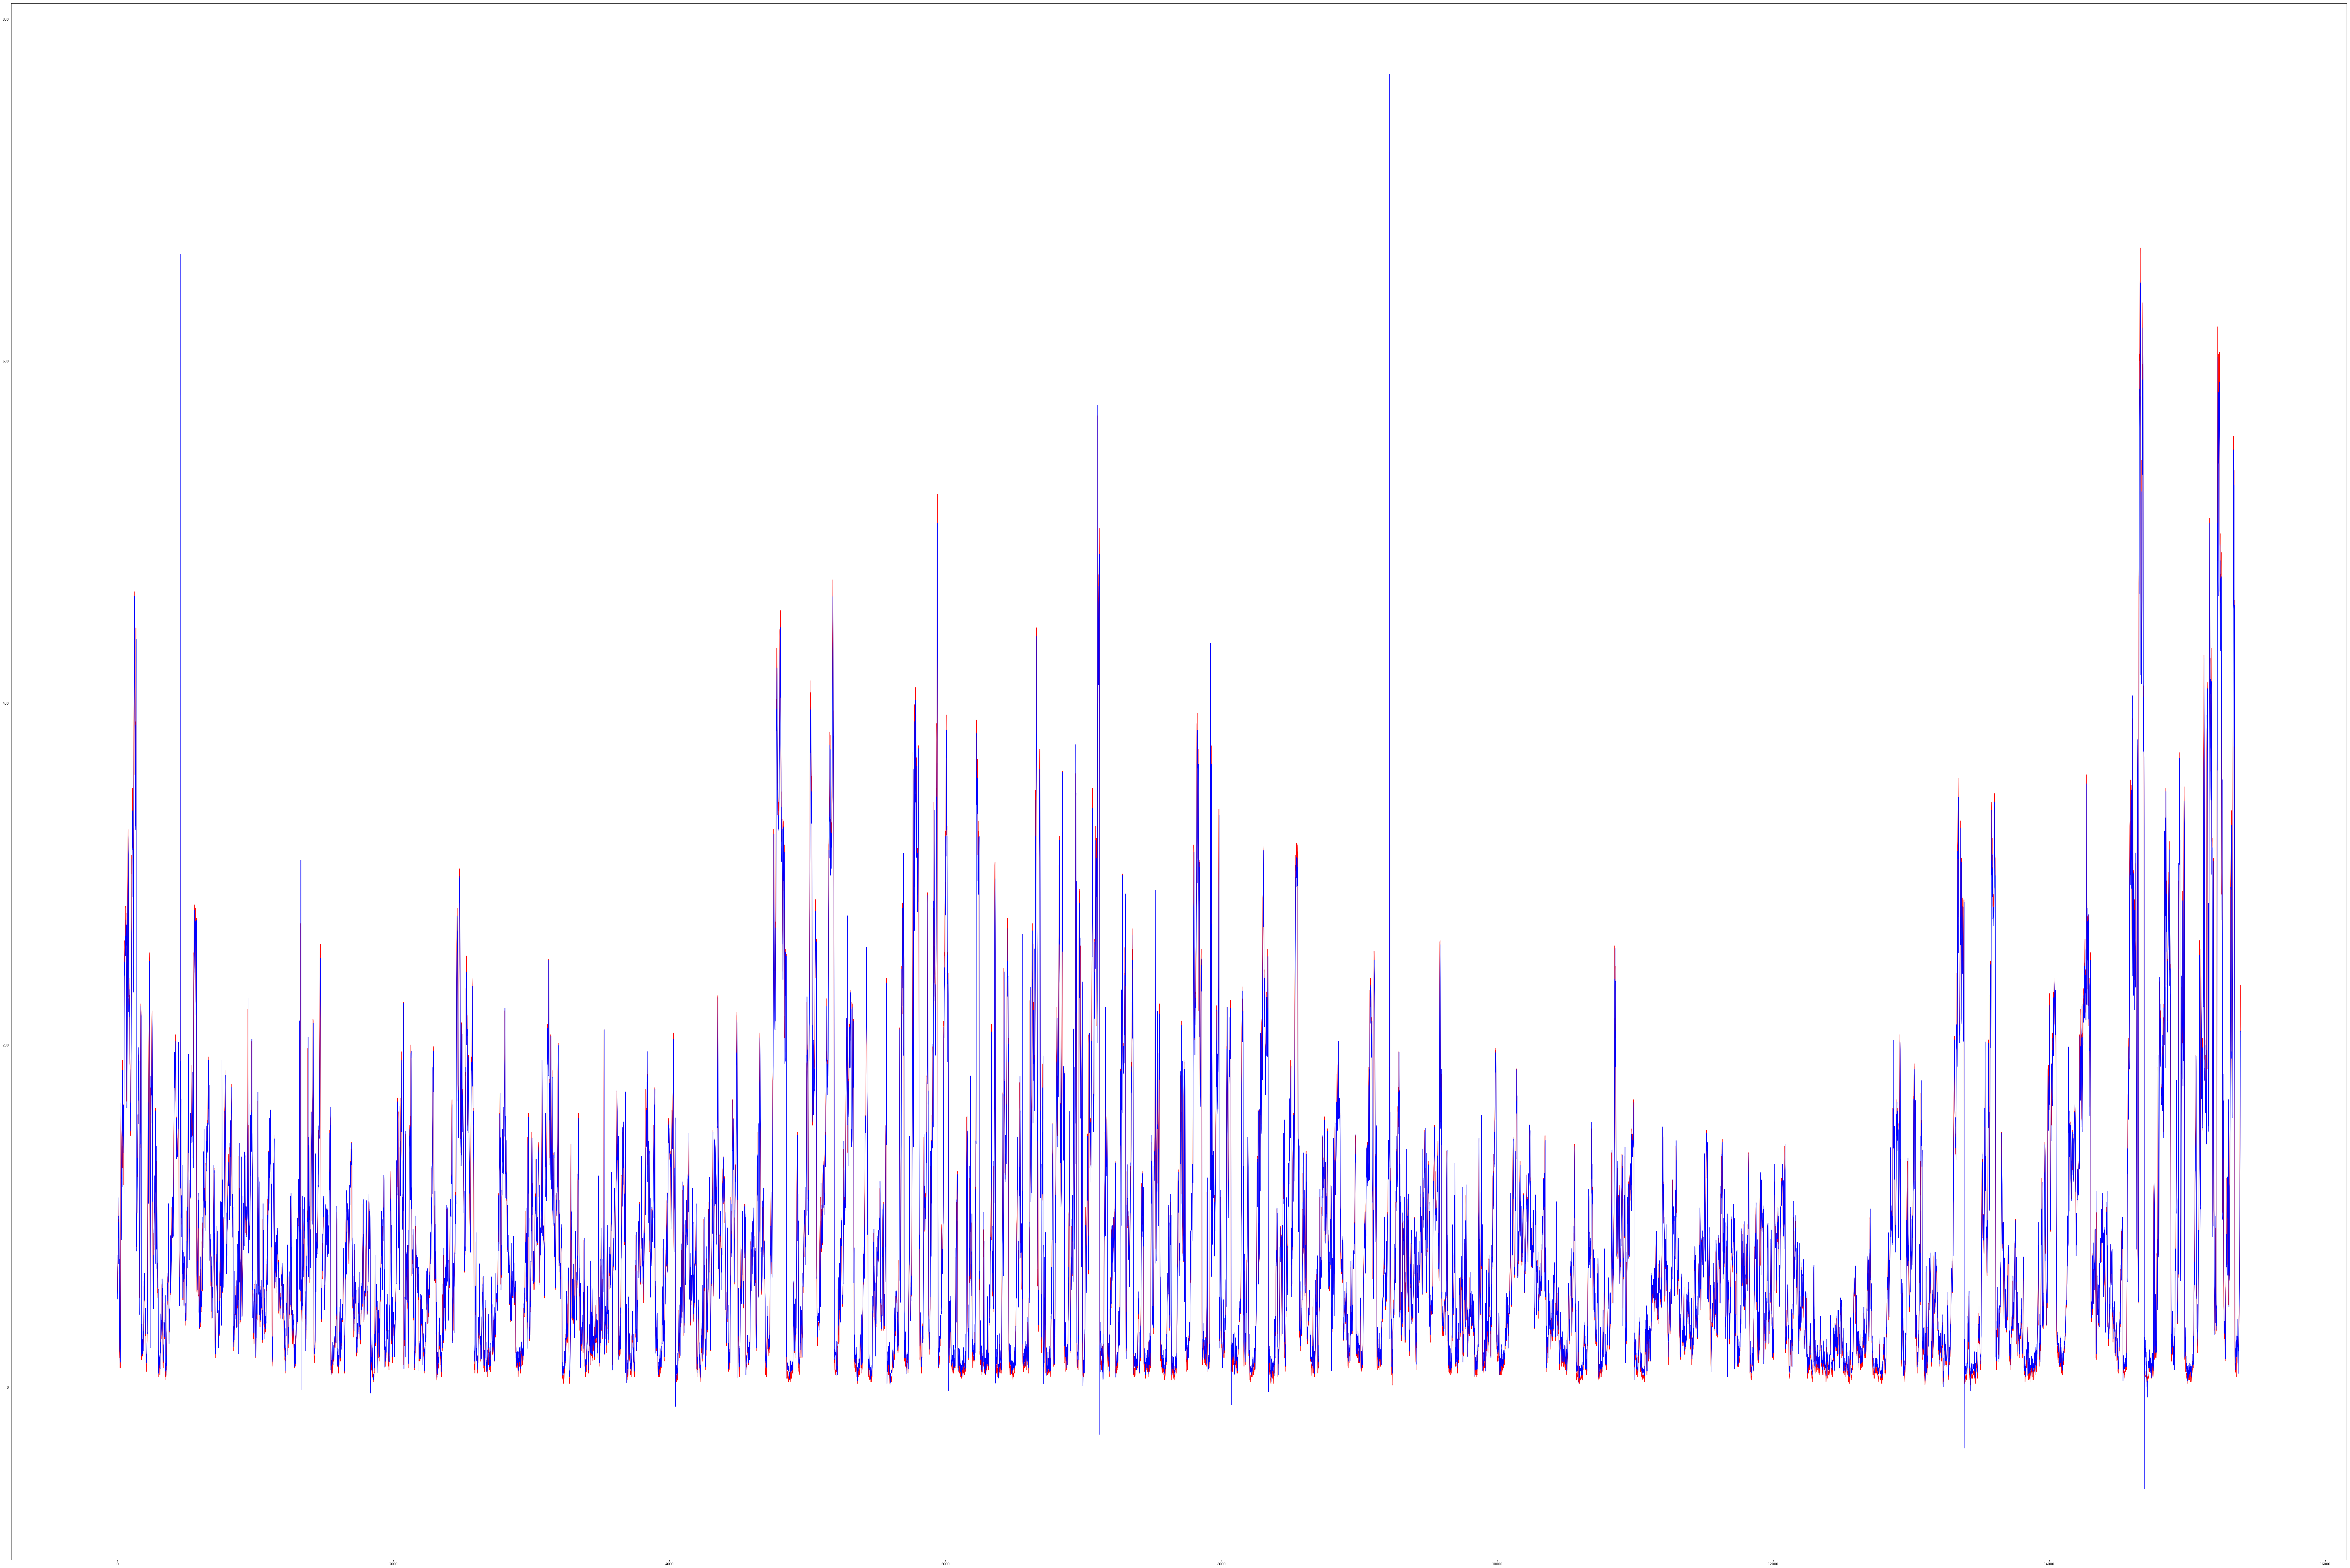

In [242]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([2, 2, 16, 16]) # left, bottom, width, height (range 0 to 1)


plt.plot(test, color='red')
plt.plot(predictions, color='blue')
plt.show()

download image for more clarity

and observe the blue color(predicted) overlapping red colour(our dataset)